# Trabalho de Introdução a Ciência de Dados

## Membros

#### Turma 6
* Clairton Carneiro Luz (2315530)

#### Turma 9
* Caio Nascimento

## Instalando dependências

In [18]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Carregando os dados

In [19]:
import pandas as pd

# Read the dataset
df = pd.read_csv('datasets/nba_stats.csv')

# Display the first few rows of the dataset
df.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


## Análise exploratória

In [20]:
# Display the shape of the dataset
print(df.shape)
# Display the columns of the dataset
print(df.columns)

(8162, 54)
Index(['year', 'name', 'playerId', 'playerSlug', 'positionId', 'teamId',
       'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'position', 'birthdate', 'college', 'draftinfo',
       'birthplace', 'team', 'htwt', 'experience', 'rankingSalary', 'salary'],
      dtype='object')


In [21]:
# null values
df.isnull().sum()

year                                   0
name                                   0
playerId                               0
playerSlug                             0
positionId                             6
teamId                                 0
status                                 0
gamesPlayed                            0
avgMinutes                             0
avgFouls                               0
flagrantFouls                          0
technicalFouls                         0
ejections                              0
doubleDouble                           0
tripleDouble                           0
minutes                                0
rebounds                               0
fouls                                  0
avgRebounds                            0
avgPoints                              0
avgFieldGoalsMade                      0
avgFieldGoalsAttempted                 0
fieldGoalPct                           0
avgThreePointFieldGoalsMade            0
avgThreePointFie

## Limpeza dos dados

In [22]:
from datetime import datetime

# Limpar coluna de salário
df["salary_clean"] = df["salary"].replace('[\$,]', '', regex=True).astype(float)

# algumas colunas do birthdate está assim "2/19/1980 (43)"" isso é pra remover o está depois do ano
df["birthdate"] = df["birthdate"].str.split(' ').str[0]
# converte coluna birthdate que está no forma M/D/YYYY para datetime
df["birthdate"] = df["birthdate"].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

# cria coluna com idade do jogador no year do registro
df["age"] = (df["year"] - df["birthdate"].dt.year).astype(int)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year                              8162 non-null   int64         
 1   name                              8162 non-null   object        
 2   playerId                          8162 non-null   int64         
 3   playerSlug                        8162 non-null   object        
 4   positionId                        8156 non-null   object        
 5   teamId                            8162 non-null   object        
 6   status                            8162 non-null   object        
 7   gamesPlayed                       8162 non-null   float64       
 8   avgMinutes                        8162 non-null   float64       
 9   avgFouls                          8162 non-null   float64       
 10  flagrantFouls                     8162 non-null 

## Pre processamento

### Criar coluna com pontos de performance para ajudar no modelo

In [24]:
# Coluna performance baseada no calculo:
# Performance = avgPoints + 1.2 * avgAssists + 1.1 * avgRebounds + 1.5 * avgSteals + 1.5 * avgBlocks - avgTurnovers

df["performance"] = df["avgPoints"] + 1.2 * df["avgAssists"] + 1.1 * df["avgRebounds"] + 1.5 * df["avgSteals"] + 1.5 * df["avgBlocks"] - df["avgTurnovers"]
df["salary_performance"] = df["salary_clean"] / df["performance"]

df.head()


,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,birthplace,team,htwt,experience,rankingSalary,salary,salary_clean,age,performance,salary_performance
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,"Hampton, VA",NaN,NaN,NaN,15,"$9,000,000",9000000.0,24,37.910417,237401.769345
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,"Hampton, VA",NaN,NaN,NaN,27,"$10,125,000",10125000.0,25,38.140000,265469.320882
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,"Hampton, VA",NaN,NaN,NaN,17,"$11,250,000",11250000.0,26,41.652112,270094.345349
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,"Hampton, VA",NaN,NaN,NaN,14,"$12,375,000",12375000.0,27,43.510000,284417.377244
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,"Hampton, VA",NaN,NaN,NaN,11,"$13,500,000",13500000.0,28,39.709755,339966.841644


### Por que esses pesos?

* Pontos (1x): são a métrica mais direta de contribuição.

* Assistências (1.2x): cada assistência geralmente contribui com pelo menos 2 pontos — logo, tem valor alto.

* Rebotes (1.1x): recuperam a posse de bola e podem virar pontos.

* Roubos e tocos (1.5x): têm grande impacto defensivo, muitas vezes virando contra-ataques.

* Turnovers (–1x): indicam erros que devolvem a bola ao adversário.

Esse tipo de score é inspirado em fórmulas como o "Game Score" da NBA e métricas avançadas como o "PER" (Player Efficiency Rating), mas aqui usamos algo mais simples e transparente.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [26]:
df_encoded = df.copy()

df_encoded["status"] = df["status"].replace({"active": 1, "inactive": 0})

features_to_label_encode = [
    "position",
    "teamId",
    "college",
    "birthplace",
]

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in features_to_label_encode:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])
# Verifica se tem valores nulos
df_encoded.isnull().sum()

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_78623/3295785555.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded["status"] = df["status"].replace({"active": 1, "inactive": 0})


year                                   0
name                                   0
playerId                               0
playerSlug                             0
positionId                             6
teamId                                 0
status                                 0
gamesPlayed                            0
avgMinutes                             0
avgFouls                               0
flagrantFouls                          0
technicalFouls                         0
ejections                              0
doubleDouble                           0
tripleDouble                           0
minutes                                0
rebounds                               0
fouls                                  0
avgRebounds                            0
avgPoints                              0
avgFieldGoalsMade                      0
avgFieldGoalsAttempted                 0
fieldGoalPct                           0
avgThreePointFieldGoalsMade            0
avgThreePointFie

In [27]:
features_to_standardize = [
    "gamesPlayed",
    "avgMinutes",
    "avgFouls",
    "flagrantFouls",
    "technicalFouls",
    "ejections",
    "doubleDouble",
    "tripleDouble",
    "minutes",
    "rebounds",
    "fouls",
    "avgRebounds",
    "avgPoints",
    "avgFieldGoalsMade",
    "avgFieldGoalsAttempted",
    "fieldGoalPct",
    "avgThreePointFieldGoalsMade",
    "avgThreePointFieldGoalsAttempted",
    "threePointFieldGoalPct",
    "avgFreeThrowsMade",
    "avgFreeThrowsAttempted",
    "freeThrowPct",
    "avgAssists",
    "avgTurnovers",
    "points",
    "fieldGoalsMade",
    "fieldGoalsAttempted",
    "threePointFieldGoalsMade",
    "threePointFieldGoalsAttempted",
    "freeThrowsMade",
    "freeThrowsAttempted",
    "assists",
    "turnovers",
    "avgSteals",
    "avgBlocks",
    "steals",
    "blocks",
    "performance",
]

df_encoded_and_standardized = df_encoded.copy()
# Standardization
scaler = StandardScaler()

df_encoded_and_standardized[features_to_standardize] = scaler.fit_transform(
    df_encoded_and_standardized[features_to_standardize]
)
# Verifica se tem valores nulos
df_encoded_and_standardized.isnull().sum()

year                                   0
name                                   0
playerId                               0
playerSlug                             0
positionId                             6
teamId                                 0
status                                 0
gamesPlayed                            0
avgMinutes                             0
avgFouls                               0
flagrantFouls                          0
technicalFouls                         0
ejections                              0
doubleDouble                           0
tripleDouble                           0
minutes                                0
rebounds                               0
fouls                                  0
avgRebounds                            0
avgPoints                              0
avgFieldGoalsMade                      0
avgFieldGoalsAttempted                 0
fieldGoalPct                           0
avgThreePointFieldGoalsMade            0
avgThreePointFie

In [28]:

# features to use
features_to_use = [
    "year",
    "teamId",
    "status",
    "gamesPlayed",
    "avgMinutes",
    "avgFouls",
    "flagrantFouls",
    "technicalFouls",
    "ejections",
    "doubleDouble",
    "tripleDouble",
    "minutes",
    "rebounds",
    "fouls",
    "avgRebounds",
    "avgPoints",
    "avgFieldGoalsMade",
    "avgFieldGoalsAttempted",
    "fieldGoalPct",
    "avgThreePointFieldGoalsMade",
    "avgThreePointFieldGoalsAttempted",
    "threePointFieldGoalPct",
    "avgFreeThrowsMade",
    "avgFreeThrowsAttempted",
    "freeThrowPct",
    "avgAssists",
    "avgTurnovers",
    "points",
    "fieldGoalsMade",
    "fieldGoalsAttempted",
    "threePointFieldGoalsMade",
    "threePointFieldGoalsAttempted",
    "freeThrowsMade",
    "freeThrowsAttempted",
    "assists",
    "turnovers",
    "avgSteals",
    "avgBlocks",
    "steals",
    "blocks",
    "position",
    "age",
    "college",
    "birthplace",
    "performance",
]

target = "salary_clean"

df_encoded_and_standardized[features_to_use].isnull().sum()

year                                0
teamId                              0
status                              0
gamesPlayed                         0
avgMinutes                          0
avgFouls                            0
flagrantFouls                       0
technicalFouls                      0
ejections                           0
doubleDouble                        0
tripleDouble                        0
minutes                             0
rebounds                            0
fouls                               0
avgRebounds                         0
avgPoints                           0
avgFieldGoalsMade                   0
avgFieldGoalsAttempted              0
fieldGoalPct                        0
avgThreePointFieldGoalsMade         0
avgThreePointFieldGoalsAttempted    0
threePointFieldGoalPct              0
avgFreeThrowsMade                   0
avgFreeThrowsAttempted              0
freeThrowPct                        0
avgAssists                          0
avgTurnovers

### Matriz de Coorelação

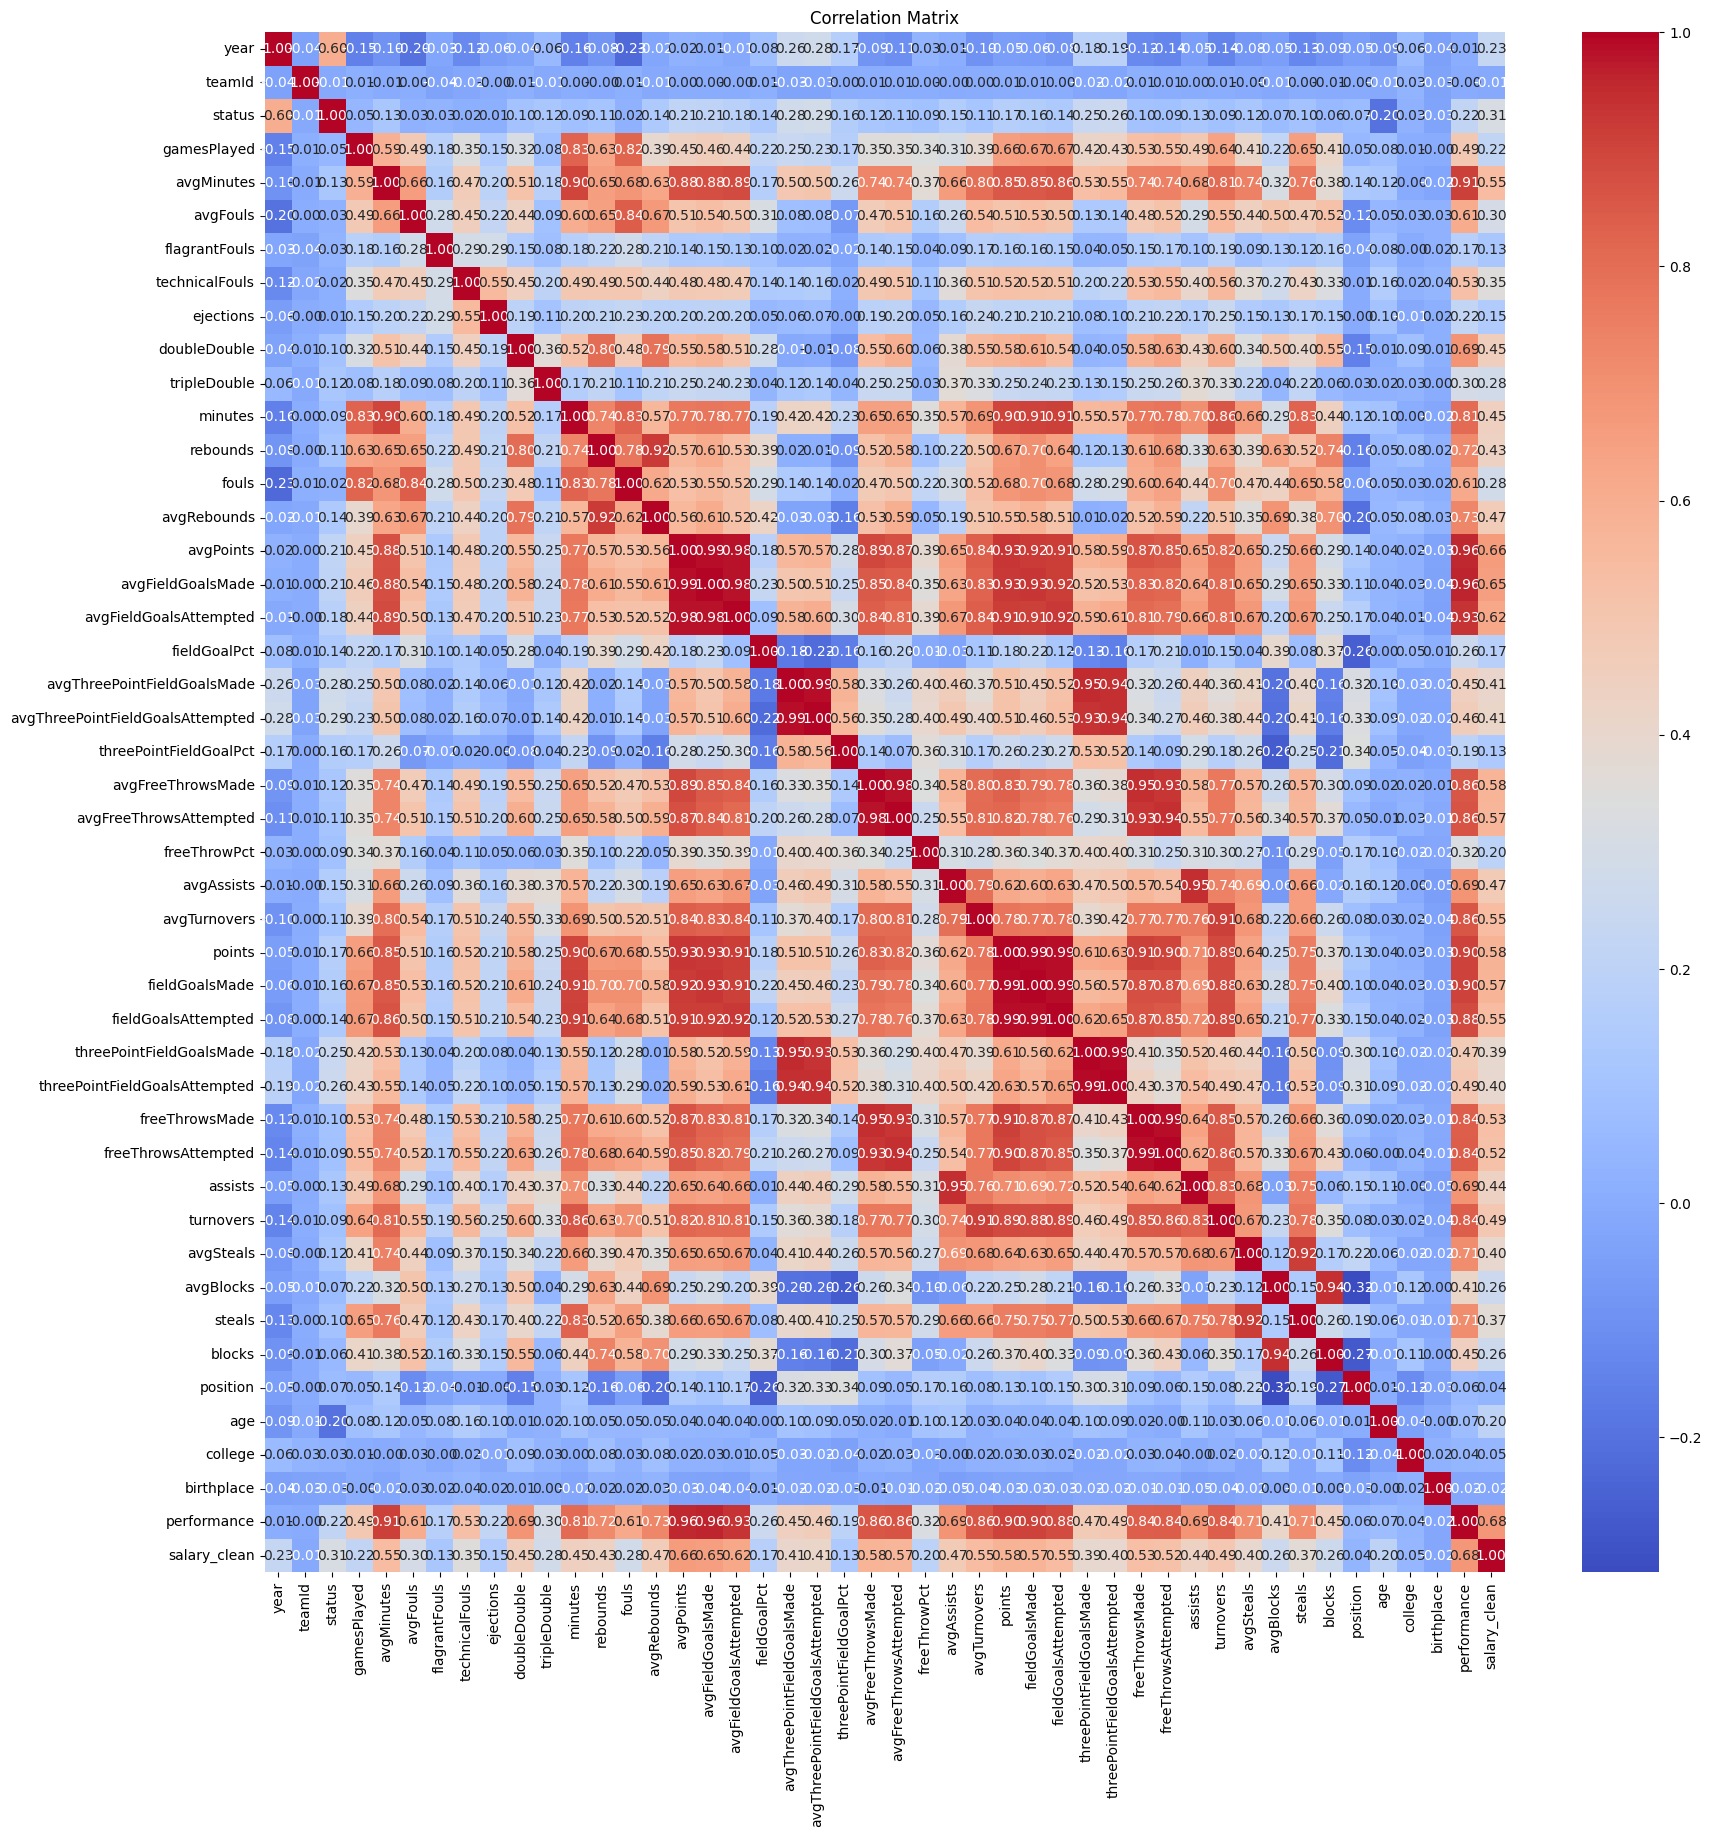

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# cria um array com os valores da feature_to_use + target
features_to_use_and_target = features_to_use.copy()
features_to_use_and_target.append(target)

plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded[features_to_use_and_target].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Treinamento do modelo

In [30]:
def calcula_metricas(y_test, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score
    # Calcular erro médio absoluto
    mae = mean_absolute_error(y_test, y_pred)
    # Calcular erro médio absoluto percentual
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # Calcular erro médio quadrático
    mse = mean_squared_error(y_test, y_pred)
    # Calcular raiz do erro médio quadrático
    rmse = root_mean_squared_error(y_test, y_pred)
    # Calcular R² (Coeficiente de Determinação)
    r2 = r2_score(y_test, y_pred)
    
    # retorne um objeto com as métricas
    return {
        "mae": mae,
        "mape": mape,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    }
    
def print_metrics(metrics):
    print(f"MAE: {metrics['mae']:.2f}")
    print(f"MAPE: {metrics['mape']:.2%}")
    print(f"MSE: {metrics['mse']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R²: {metrics['r2']:.2f}")

### Usando colunas encoded

In [45]:
# X = dados de entrada, y = salário real
X = df_encoded[features_to_use]
y = df_encoded[target]

# separar dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar regressão linear
model_encoded = LinearRegression()
model_encoded.fit(X_train, y_train)
# Prever salário
y_pred = model_encoded.predict(X_test)


encoded_metrics = calcula_metricas(y_test, y_pred)
print_metrics(encoded_metrics)

MAE: 3099512.29
MAPE: 204.05%
MSE: 19231398786679.83
RMSE: 4385361.88
R²: 0.61


### Usando colunas encoded e padronizadas

In [46]:
# X = dados de entrada, y = salário real
X = df_encoded_and_standardized[features_to_use]
y = df_encoded_and_standardized[target]

# separar dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar regressão linear
model_encoded_and_standarlized = LinearRegression()
model_encoded_and_standarlized.fit(X_train, y_train)
# Prever salário
y_pred = model_encoded_and_standarlized.predict(X_test)

encoded_and_standardized_metrics = calcula_metricas(y_test, y_pred)
print_metrics(encoded_and_standardized_metrics)

MAE: 3099512.29
MAPE: 204.05%
MSE: 19231398787008.13
RMSE: 4385361.88
R²: 0.61


In [47]:
# Modelo usando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Treinar regressão linear
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
# Prever salário
y_pred_pca = model_pca.predict(X_test_pca)

pca_metrics = calcula_metricas(y_test, y_pred_pca)
print_metrics(pca_metrics)


MAE: 4981120.32
MAPE: 463.04%
MSE: 48802410498437.74
RMSE: 6985872.21
R²: -0.00


### Comparativo entre os modelos

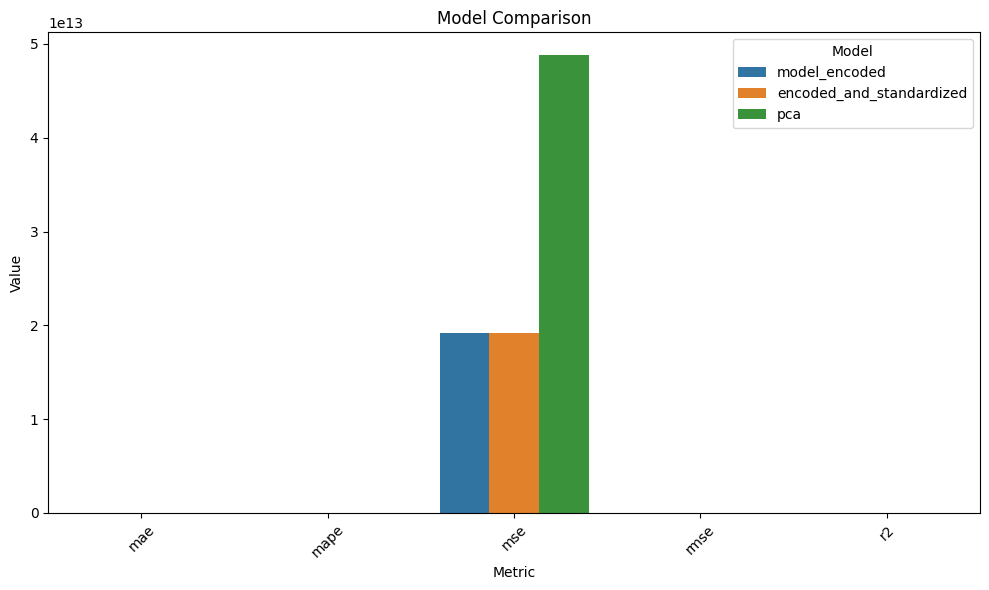

In [54]:
# Plote um grafico comparando os modelos treinados anteriormente model_encoded_metrics, encoded_and_standardized_metrics e pca_metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Cria um dataframe com os dados dos modelos
models = ["model_encoded", "encoded_and_standardized", "pca"]
metrics = [encoded_metrics, encoded_and_standardized_metrics, pca_metrics]
metrics_df = pd.DataFrame(metrics, index=models)
# Transforma o dataframe para o formato longo
metrics_df_long = metrics_df.reset_index().melt(id_vars="index", var_name="metric", value_name="value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_long, x="metric", y="value", hue="index")
plt.title("Model Comparison")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


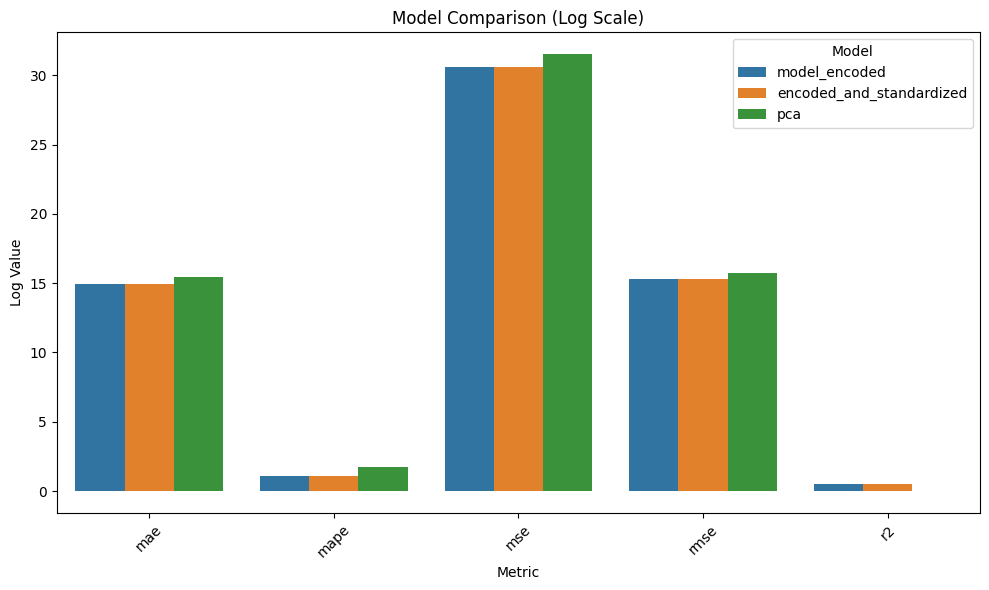

In [55]:

# Em logaritmo
plt.figure(figsize=(10, 6))
metrics_df_long["value"] = np.log1p(metrics_df_long["value"])
sns.barplot(data=metrics_df_long, x="metric", y="value", hue="index")
plt.title("Model Comparison (Log Scale)")
plt.xlabel("Metric")
plt.ylabel("Log Value")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


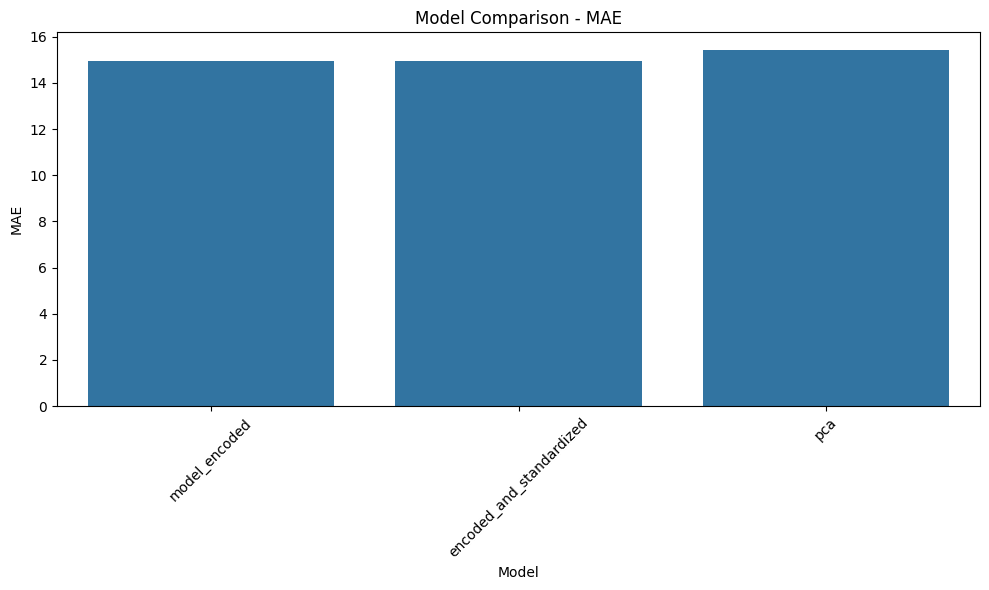

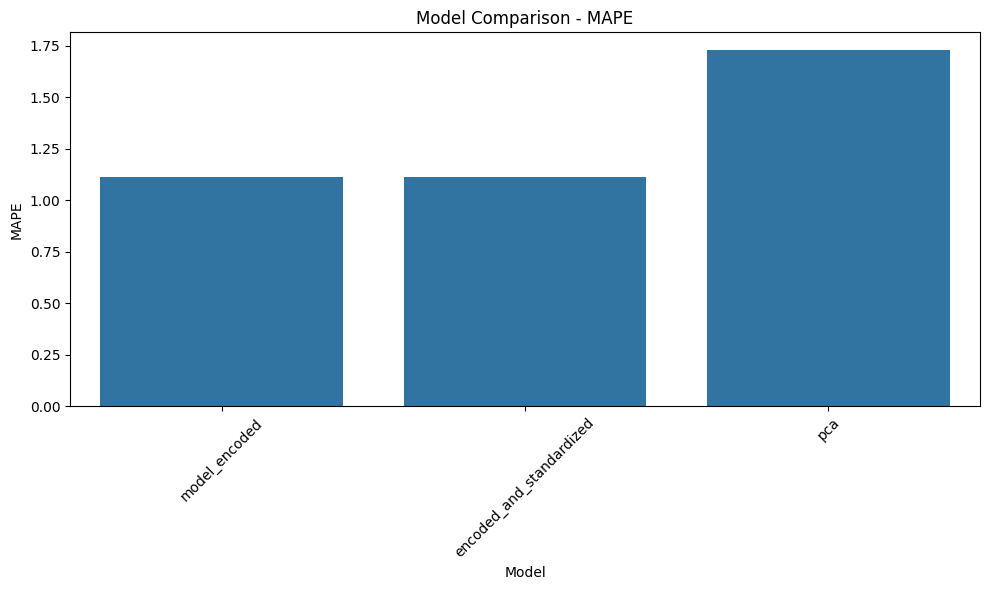

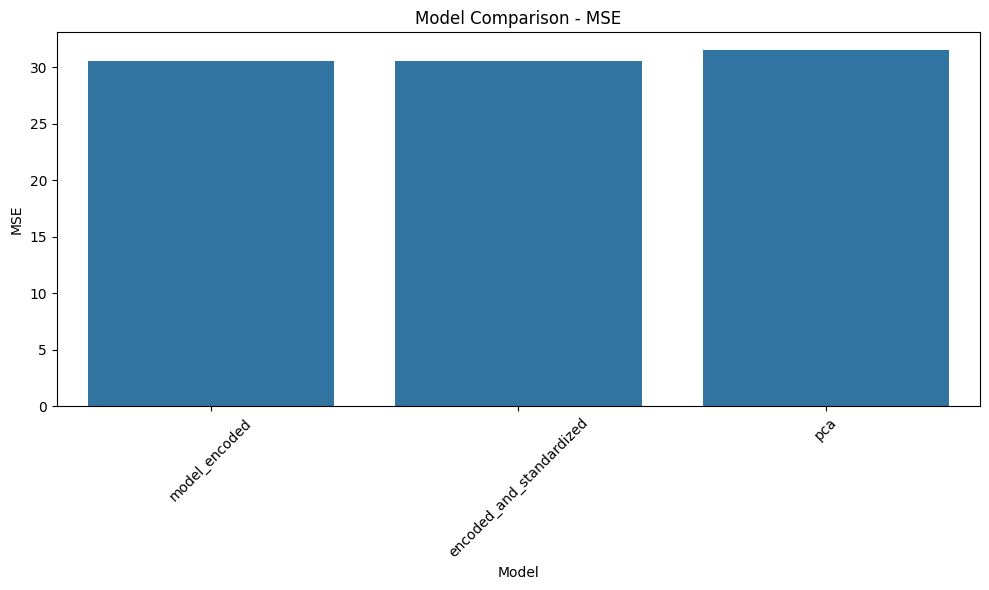

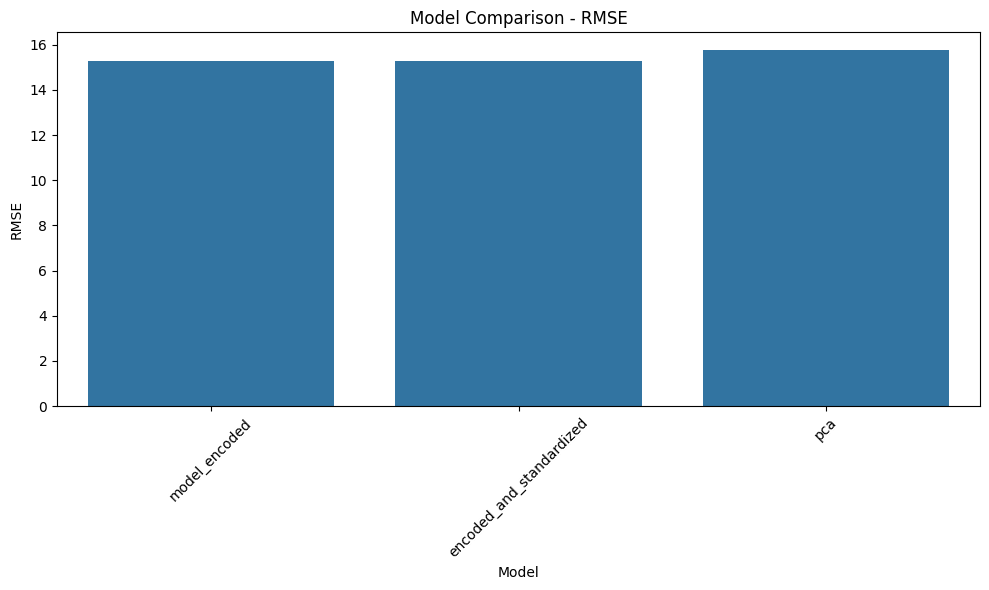

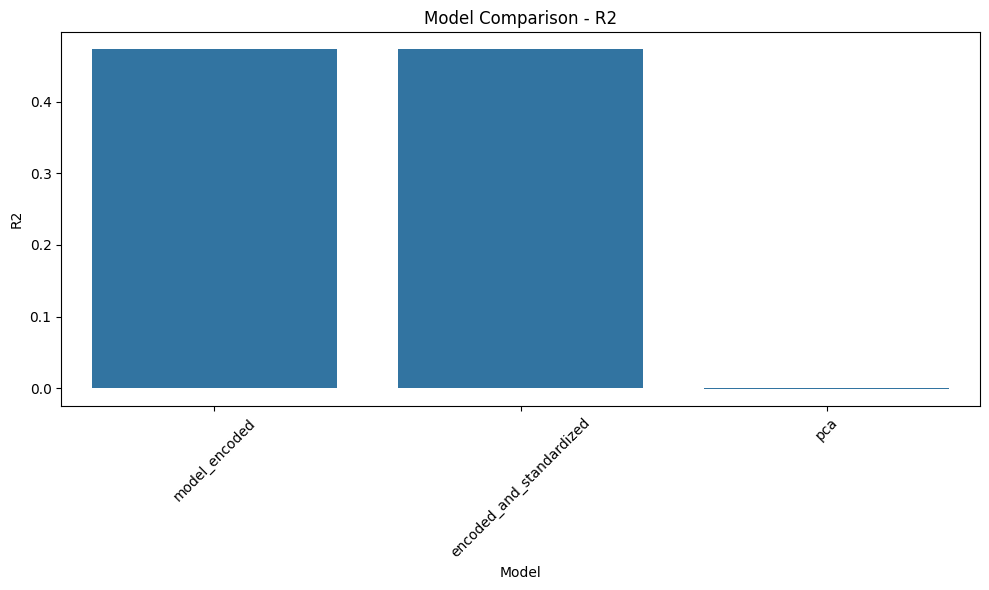

In [56]:
metrics = ["mae", "mape", "mse", "rmse", "r2"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=metrics_df_long[metrics_df_long["metric"] == metric], x="index", y="value")
    plt.title(f"Model Comparison - {metric.upper()}")
    plt.xlabel("Model")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Escolhendo modelo a ser usado

In [48]:
model = model_encoded_and_standarlized

In [34]:
# Prever salários
df["predicted_salary_clean"] = model.predict(X)
df["predicted_salary_clean"] = df["predicted_salary_clean"].round(0).astype(int)
df["predicted_salary"] = df["predicted_salary_clean"].apply(lambda x: f"${x:,}")

# Calcular diferença entre salário real e previsto
df["above_expected_salary_clean"] = df["salary_clean"] - df["predicted_salary_clean"]
df["above_expected_salary_clean"] = df["above_expected_salary_clean"].round(0).astype(int)
df["above_expected_salary"] = df["above_expected_salary_clean"].apply(lambda x: f"${x:,}")

In [35]:
# Exibir os 5 primeiros jogadores
df[["name", "year", "salary", "predicted_salary"]].head(5)

,name,year,salary,predicted_salary
0,Allen Iverson,1999,"$9,000,000","$14,145,874"
1,Allen Iverson,2000,"$10,125,000","$10,172,965"
2,Allen Iverson,2001,"$11,250,000","$13,560,922"
3,Allen Iverson,2002,"$12,375,000","$14,842,376"
4,Allen Iverson,2003,"$13,500,000","$9,110,662"


### Gráfico de dispersão (scatter plot) entre os salários reais (y_test) e os salários previstos (y_pred).

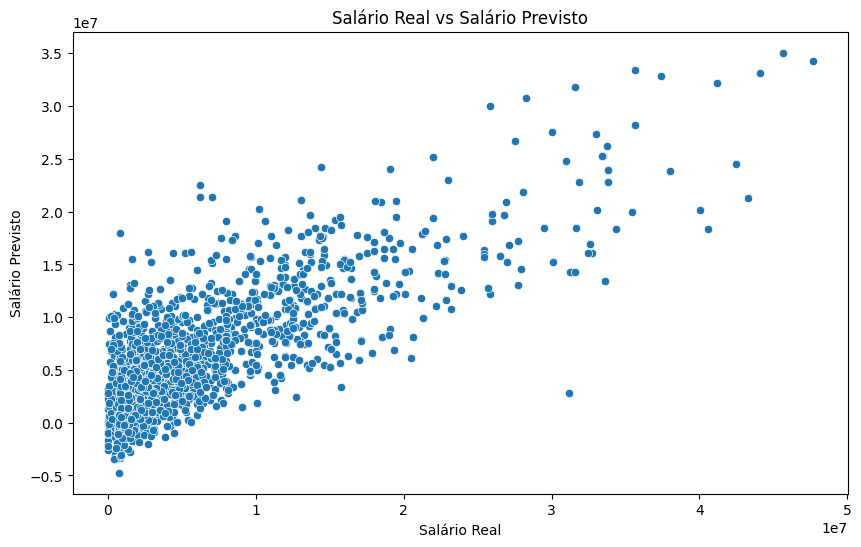

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Salário Real')
plt.ylabel('Salário Previsto')
plt.title('Salário Real vs Salário Previsto')
plt.show()

### Histograma dos resíduos (erros), que mostra a distribuição das diferenças entre y_test e y_pred (ou seja, resíduo = y_test - y_pred).

Ajuda a verificar se o modelo está errando mais para algum lado (tendência de super ou subestimar).


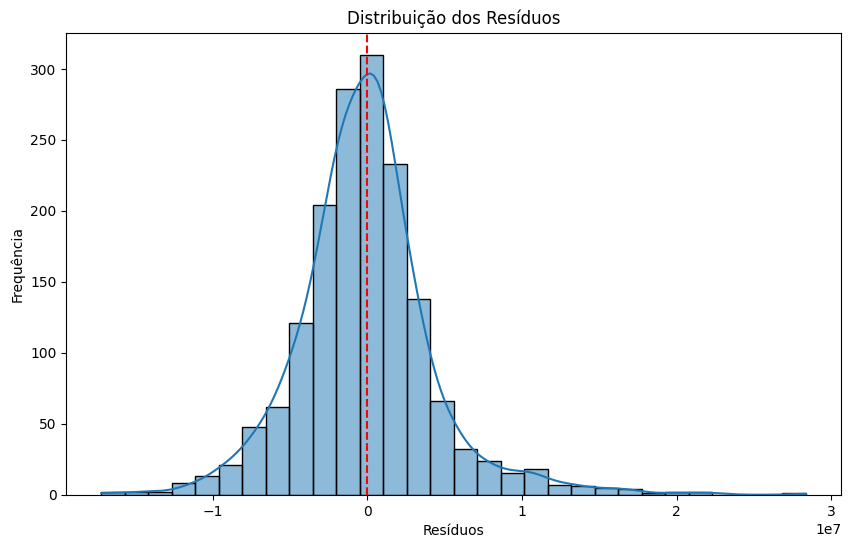

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.axvline(0, color='red', linestyle='--')
plt.show()

### Resíduos vs. valores previstos, para ver se há algum padrão nos erros.

Serve como referência: se os resíduos estiverem próximos de zero, significa que o modelo está acertando bem.

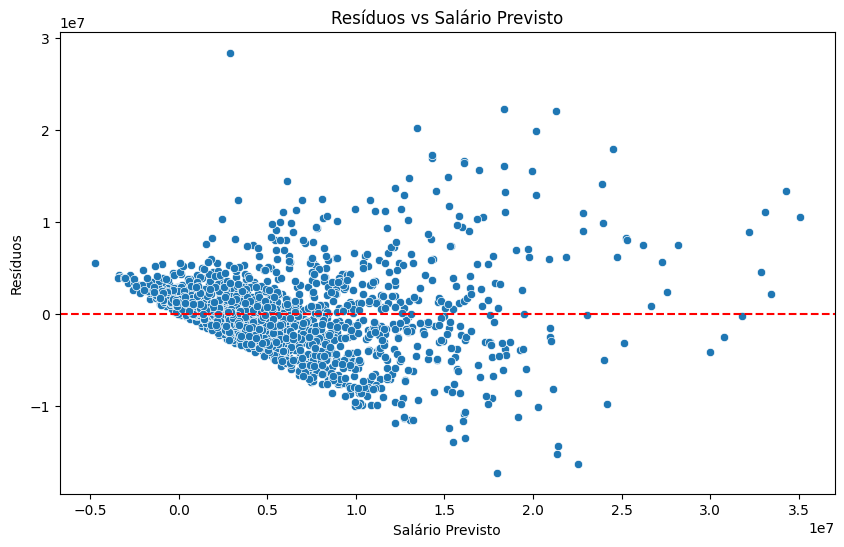

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_test - y_pred)
plt.xlabel("Salário Previsto")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Salário Previsto")
plt.axhline(0, color='red', linestyle='--')
plt.show()


Com o gráfico acima perceba que forma um (Funil ou cone) isso siginifica que os resíduos aumentam com o salário.

O modelo erra mais em valores altos.

Exemplo de heterocedasticidade.

#### Heterocedasticidade (ruim):

* Os resíduos aumentam ou diminuem sistematicamente com o salário previsto.
* Indica que o modelo erra mais para salários altos, o que pode significar:
    * O modelo está subestimando ou superestimando certos valores.
    * Pode haver não-linearidade ou variáveis importantes faltando.

### Bloxplot para ver a distribuição dos salários reais e previstos

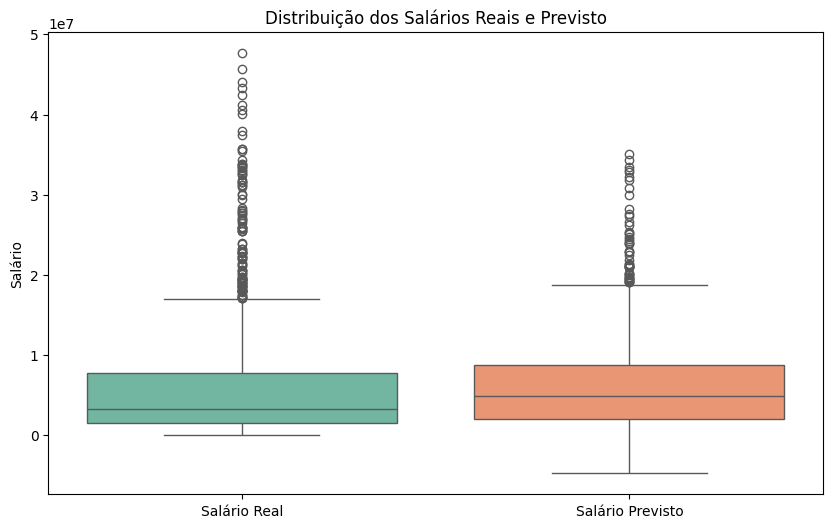

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test, y_pred], palette="Set2")
plt.xticks([0, 1], ['Salário Real', 'Salário Previsto'])
plt.ylabel("Salário")
plt.title("Distribuição dos Salários Reais e Previsto")
plt.show()


## Ranking dos jogadores mais super faturados

In [40]:
# Ordenar pelos jogadores mais acima do previsto
df_superfaturados = df.sort_values(by="above_expected_salary_clean", ascending=False)

# Exibir os top 10 jogadores mais acima do previsto
df_superfaturados[["name", "teamId", "salary", "year", "predicted_salary", "above_expected_salary"]].head(10)

,name,teamId,salary,year,predicted_salary,above_expected_salary
5270,Gordon Hayward,BOS,"$31,214,295",2018,"$2,857,927","$28,356,368"
7192,Ben Simmons,BKN,"$37,893,408",2023,"$10,531,363","$27,362,045"
5149,John Wall,HOU,"$44,310,840",2021,"$19,615,480","$24,695,360"
5615,Bradley Beal,PHX,"$46,741,590",2023,"$22,060,522","$24,681,068"
5727,Tobias Harris,PHI,"$39,270,150",2023,"$14,673,691","$24,596,459"
6245,Rudy Gobert,MIN,"$41,000,000",2023,"$17,127,649","$23,872,351"
5484,Klay Thompson,GS,"$43,219,440",2023,"$19,836,111","$23,383,329"
3345,Chris Paul,OKC,"$41,358,814",2020,"$19,107,721","$22,251,093"
5483,Klay Thompson,GS,"$40,600,080",2022,"$18,367,577","$22,232,503"
5232,Paul George,LAC,"$45,640,084",2023,"$23,582,511","$22,057,573"


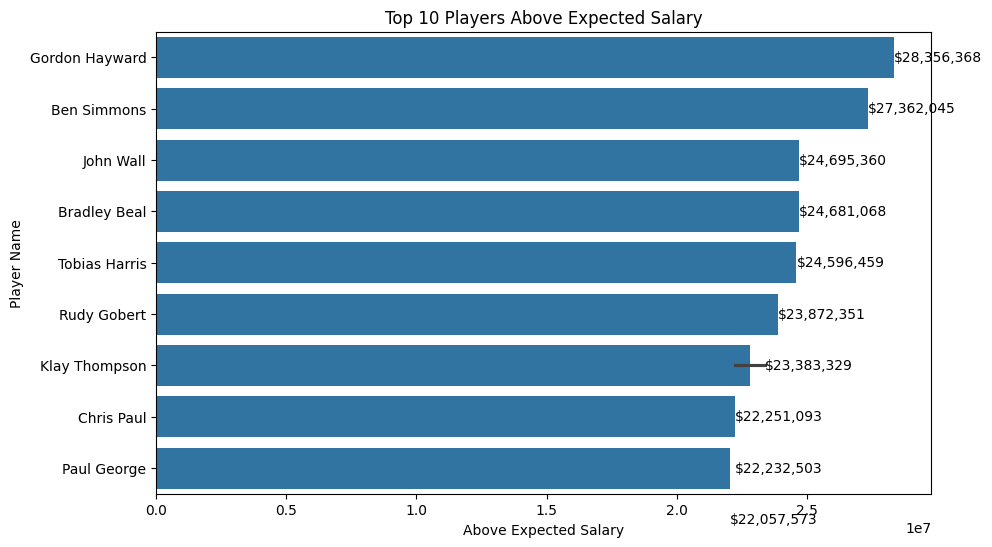

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="above_expected_salary_clean", y="name", data=df_superfaturados.head(10))
plt.title("Top 10 Players Above Expected Salary")
plt.xlabel("Above Expected Salary")
plt.ylabel("Player Name")
for index, value in enumerate(df_superfaturados.head(10)["above_expected_salary_clean"]):
    plt.text(value, index, f"${value:,}", va='center')
plt.show()


## Ranking dos jogadores mais super faturados de cada ano

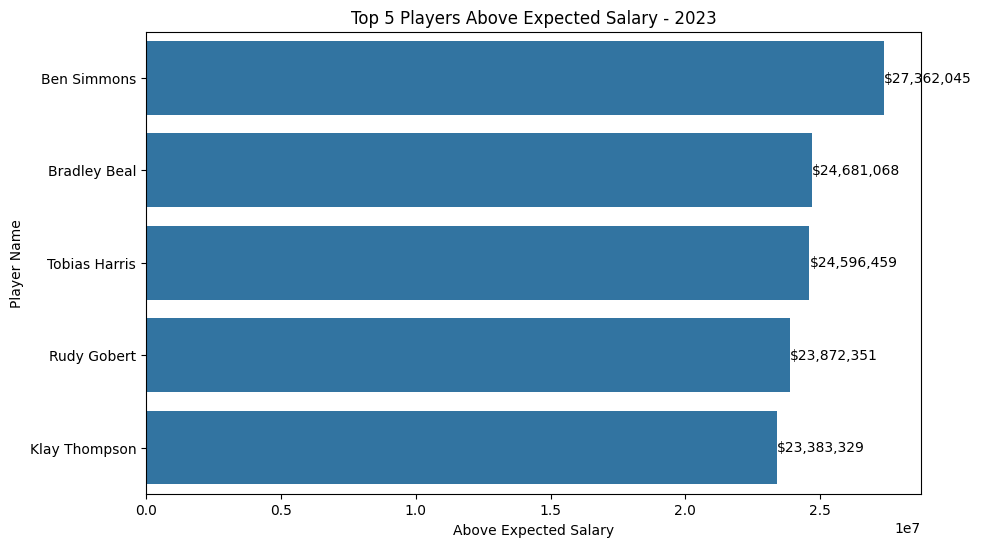

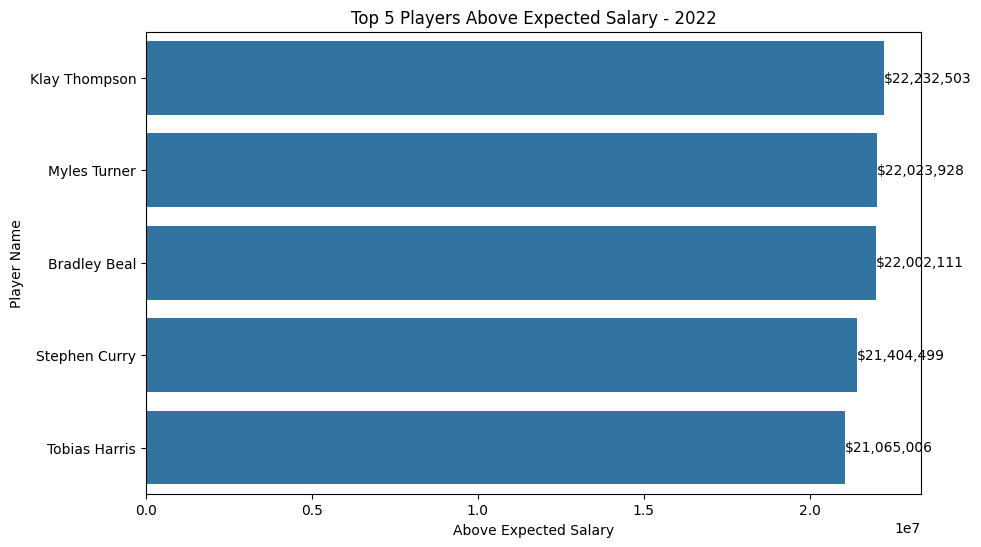

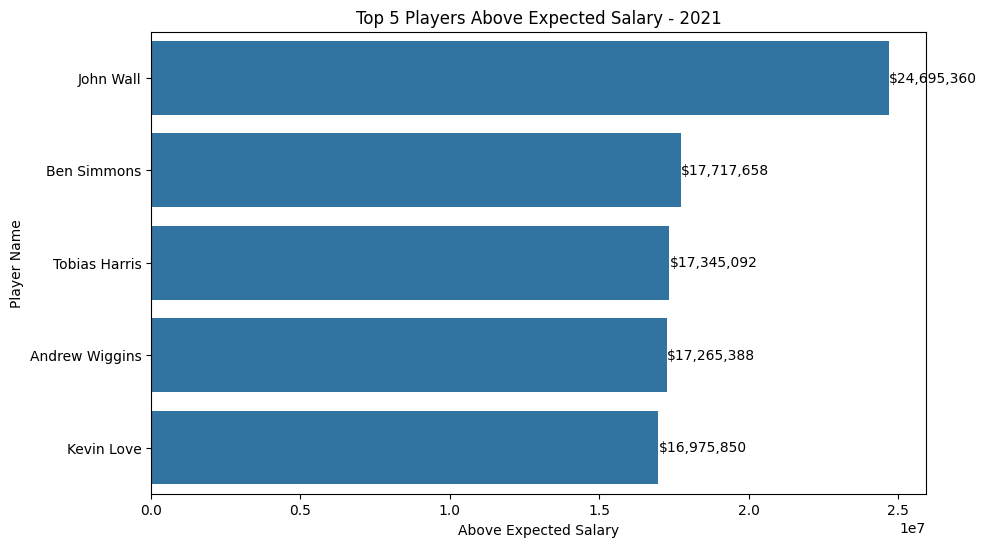

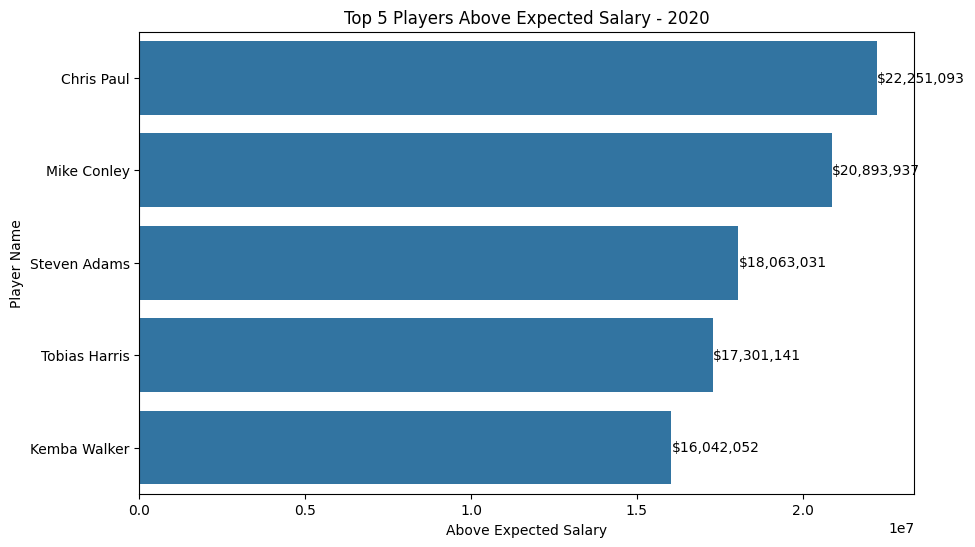

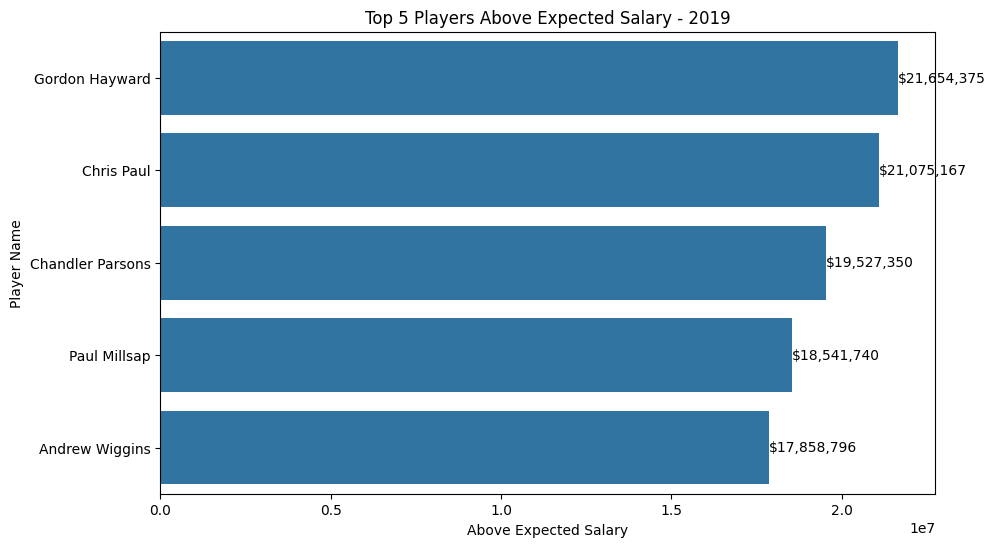

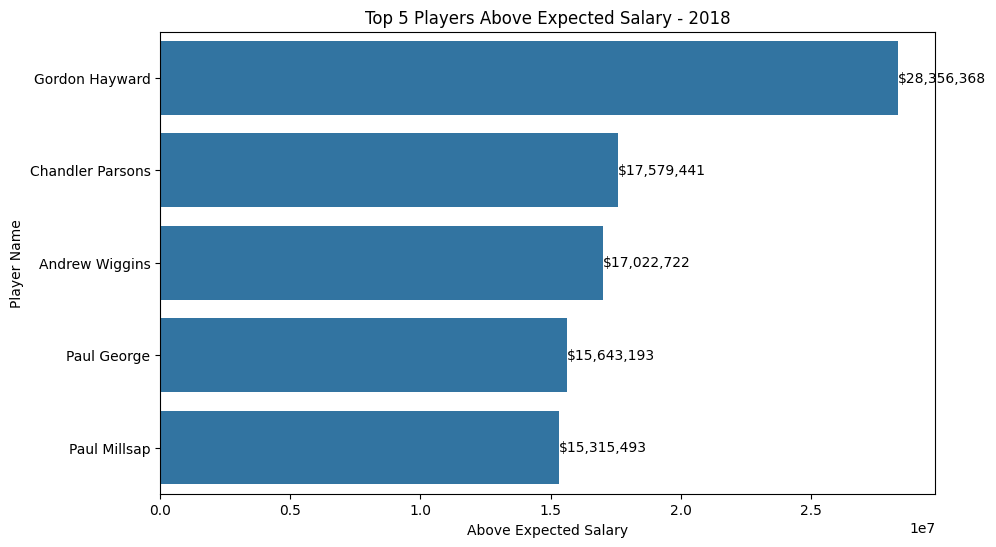

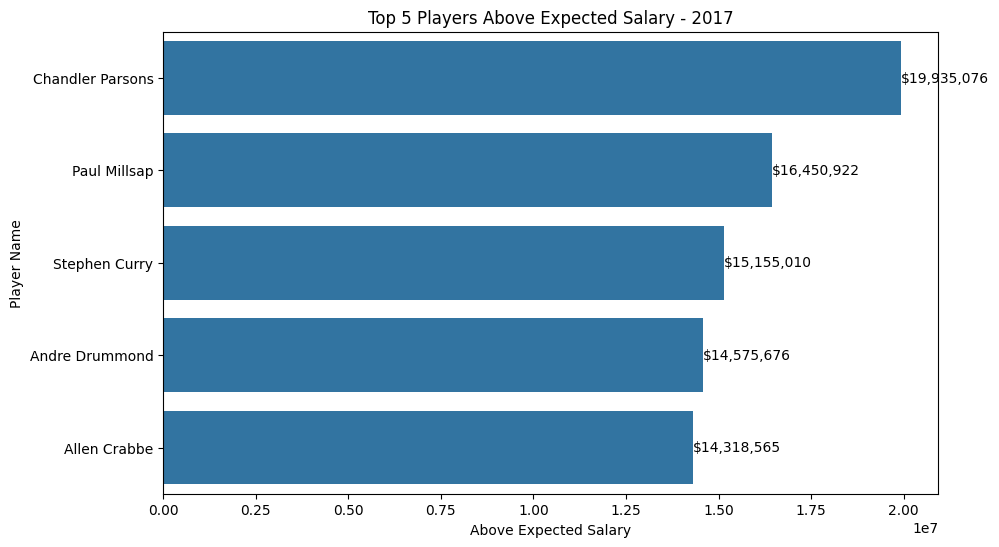

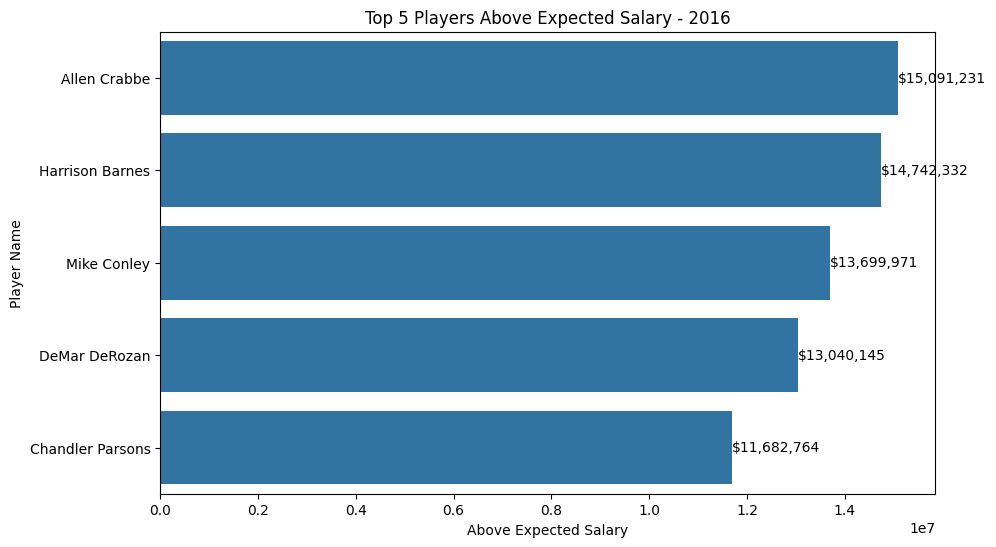

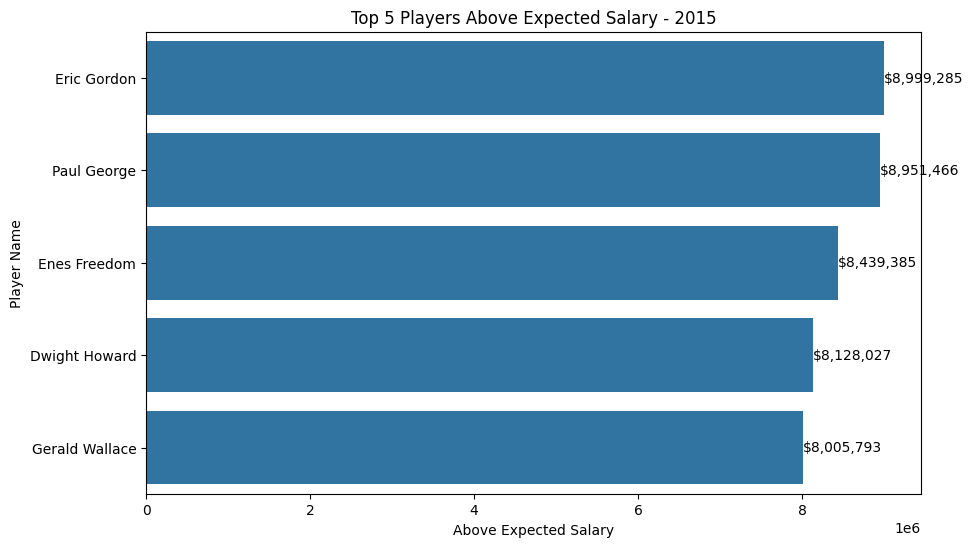

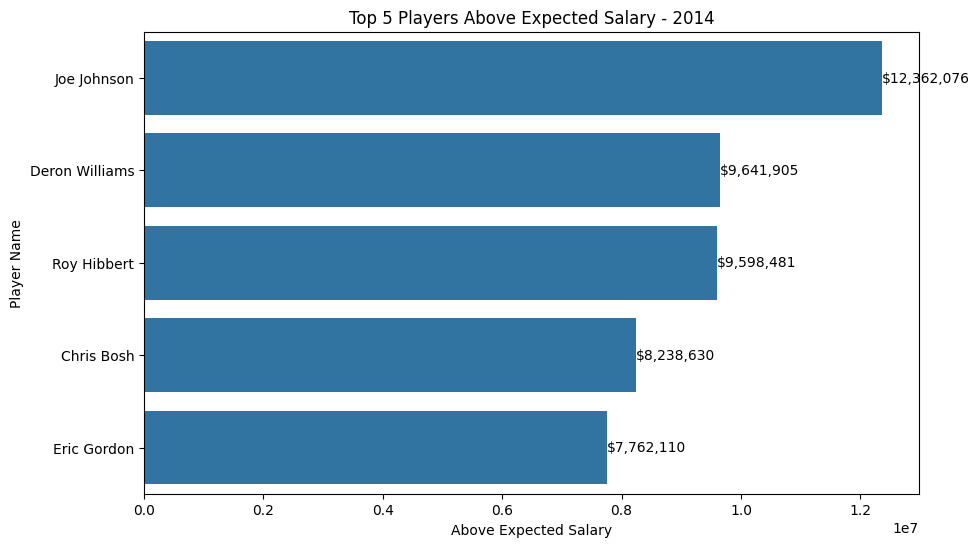

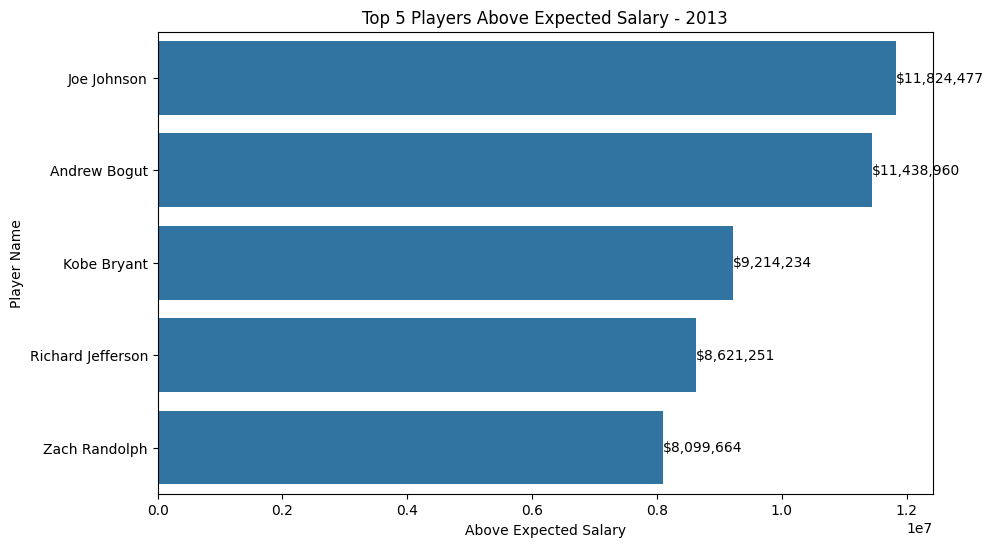

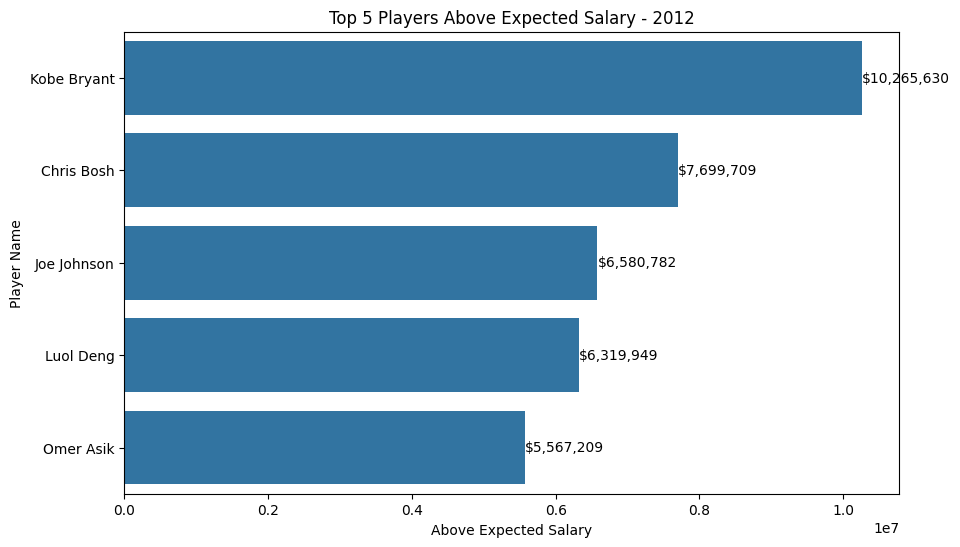

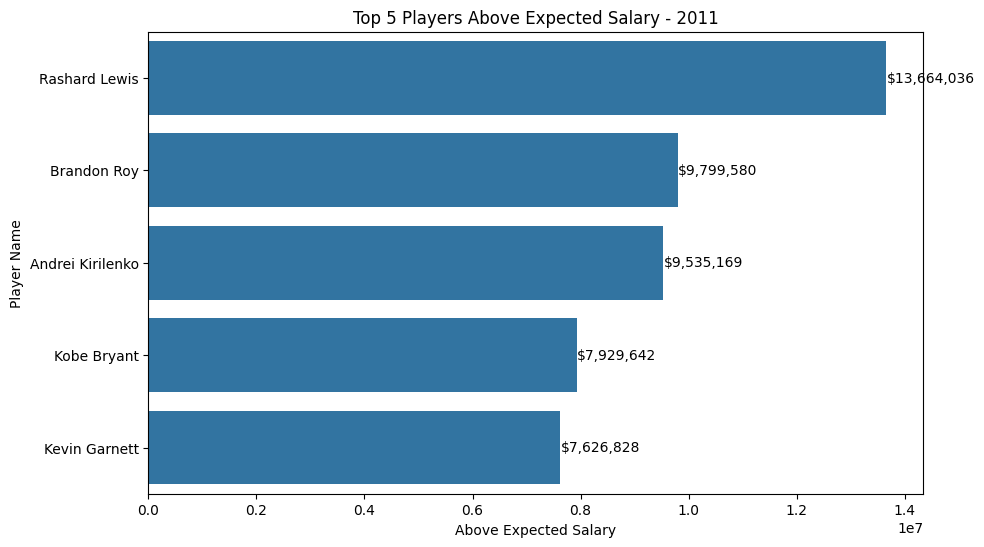

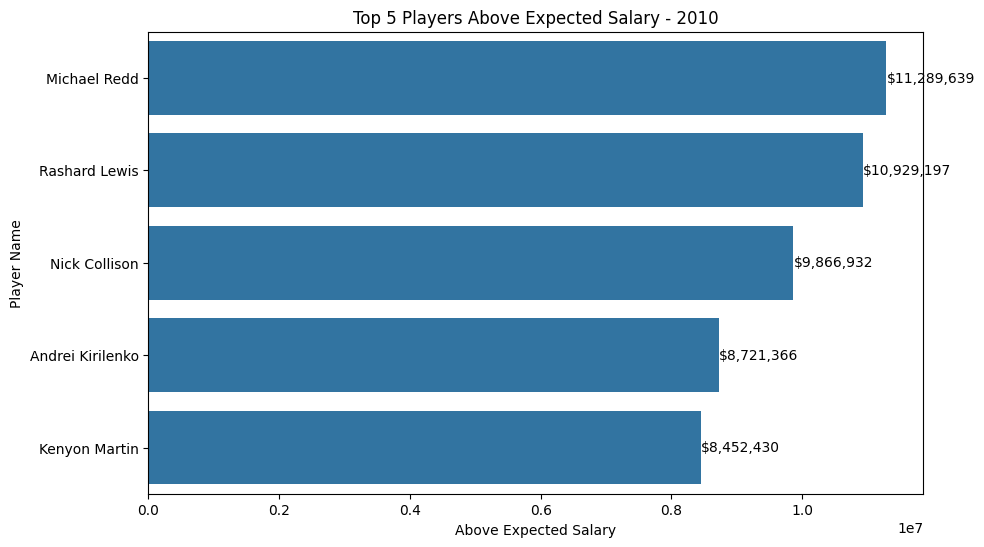

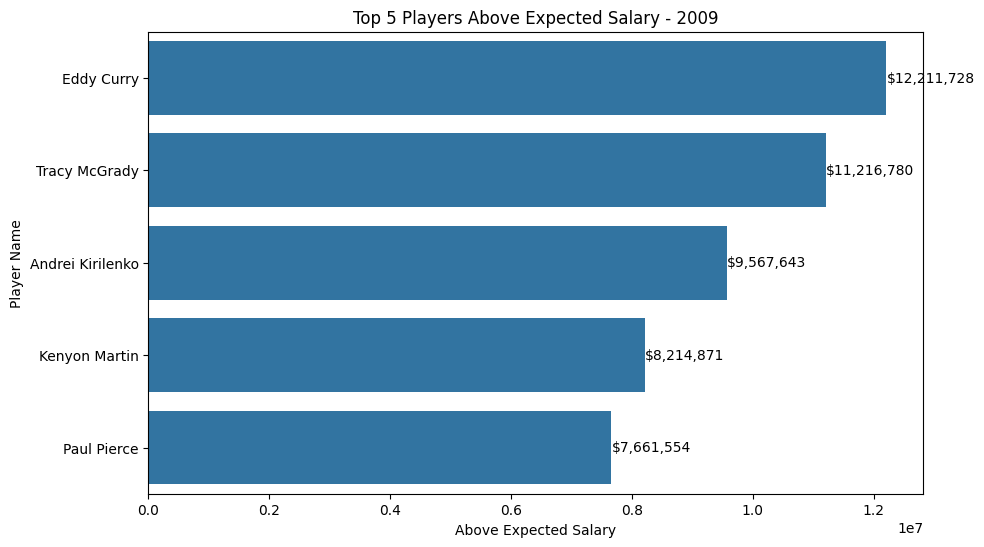

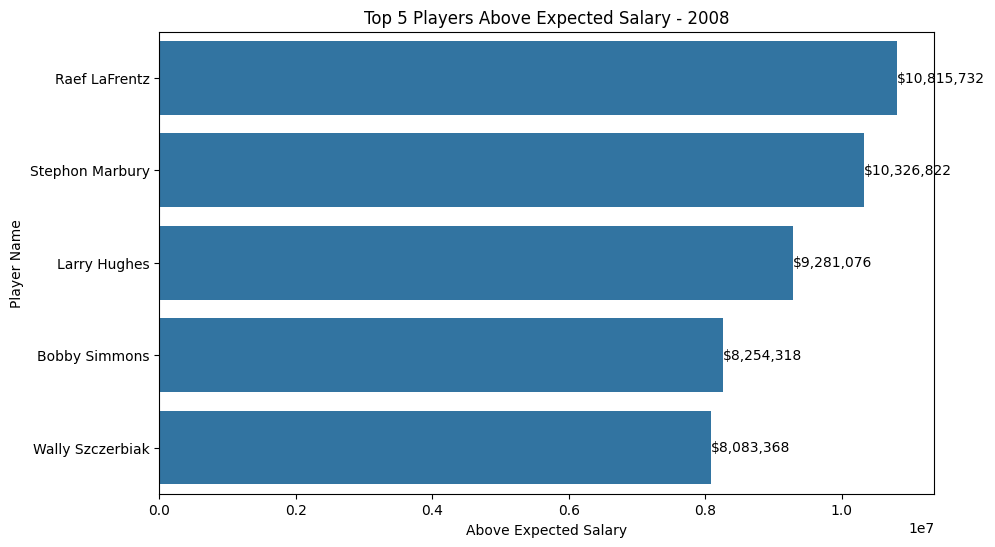

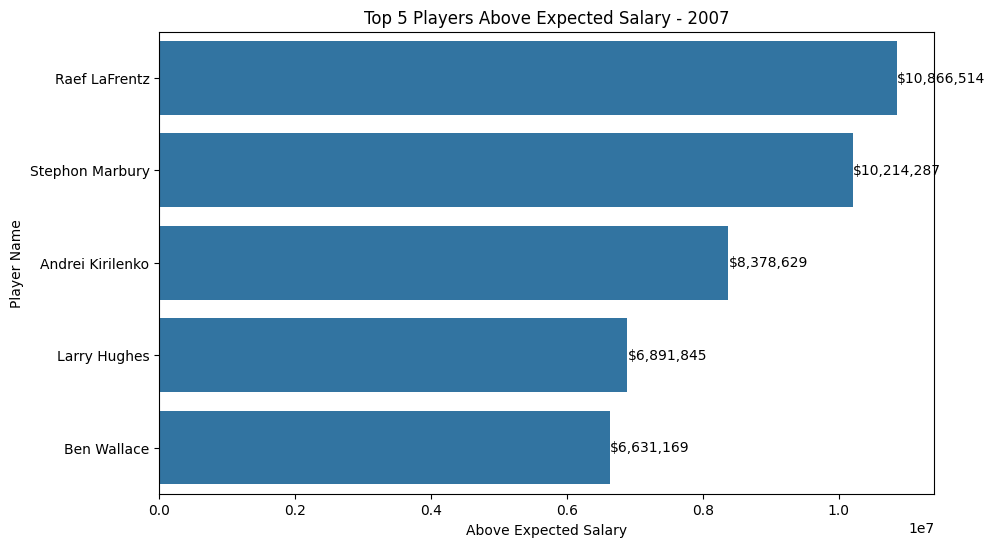

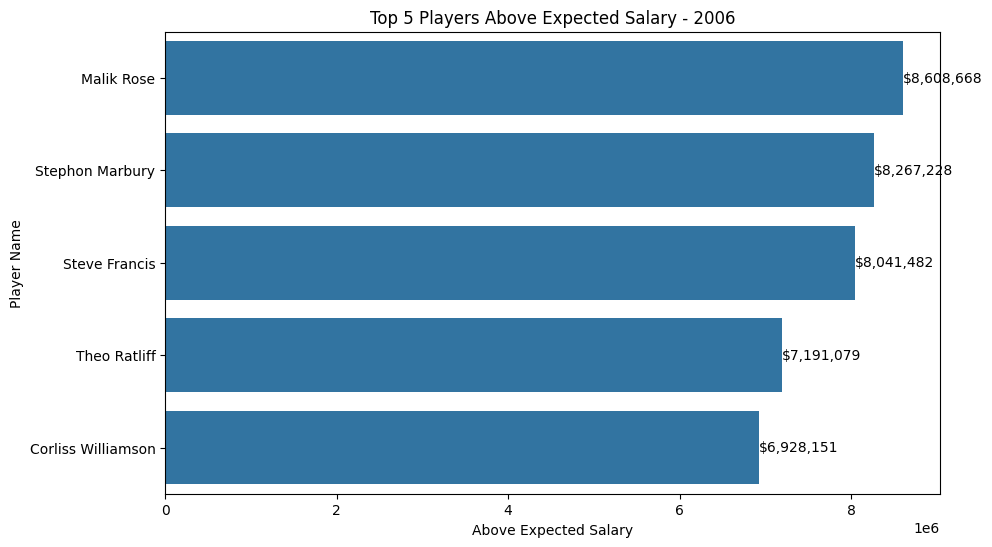

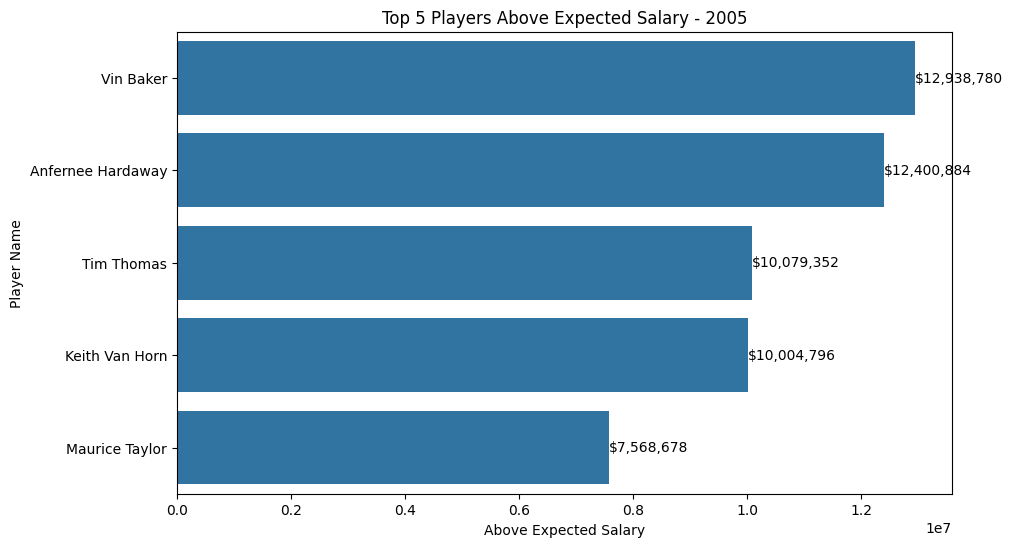

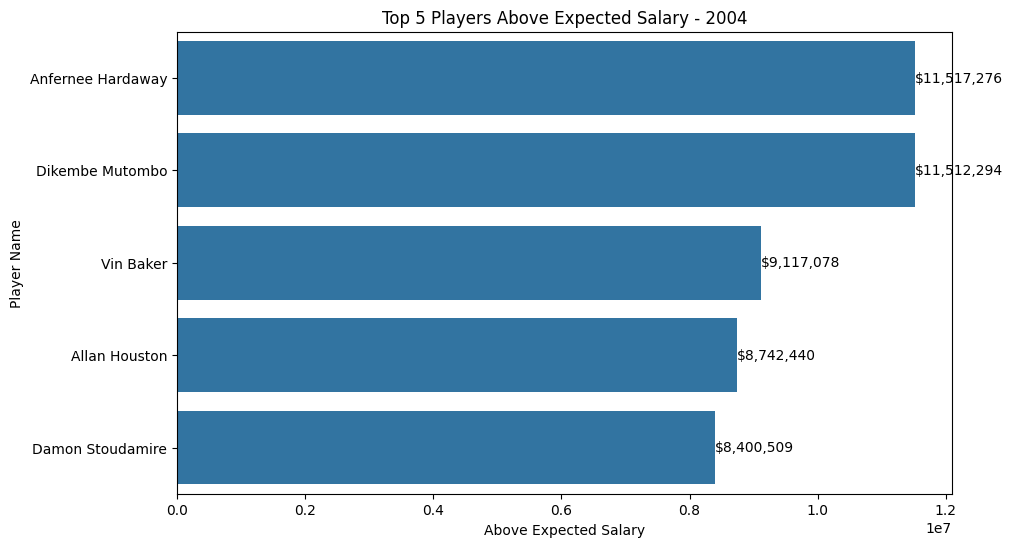

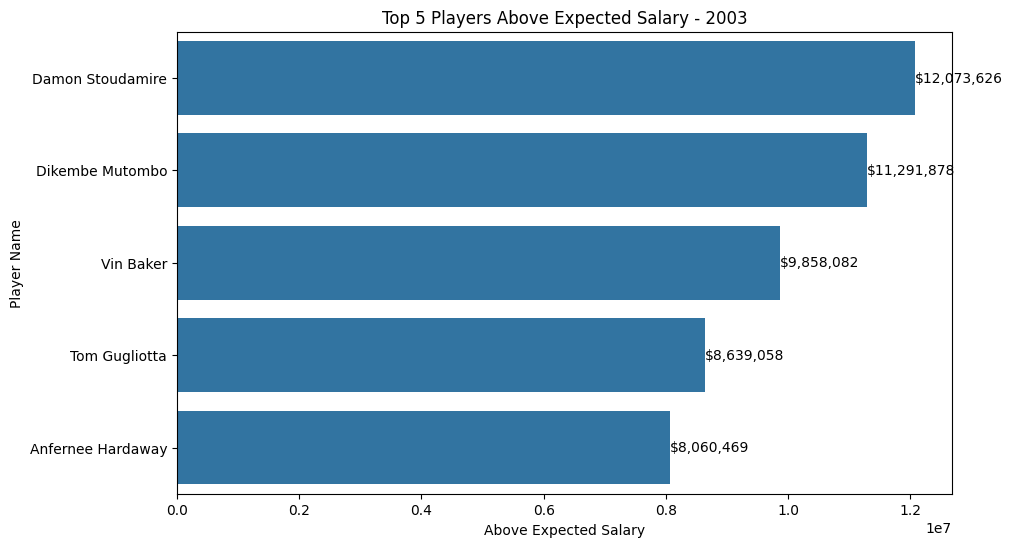

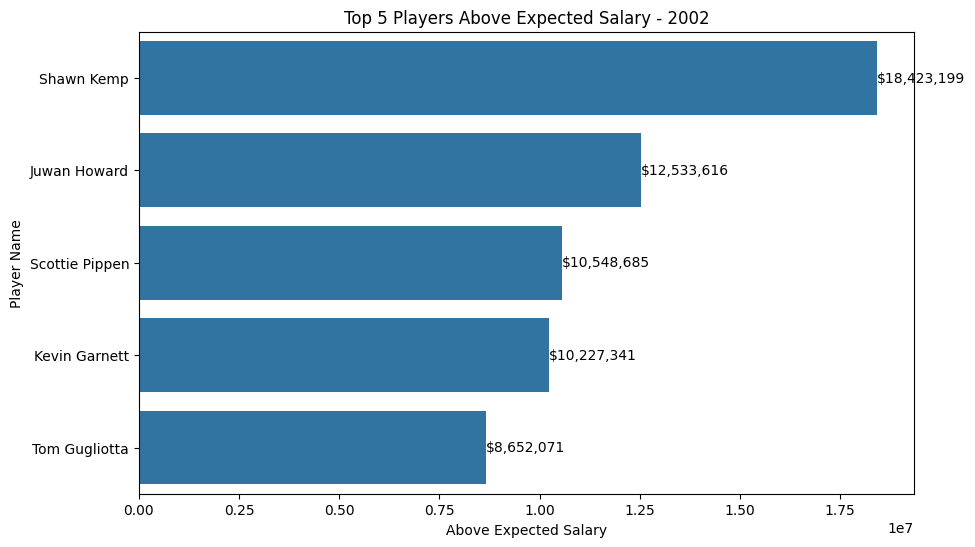

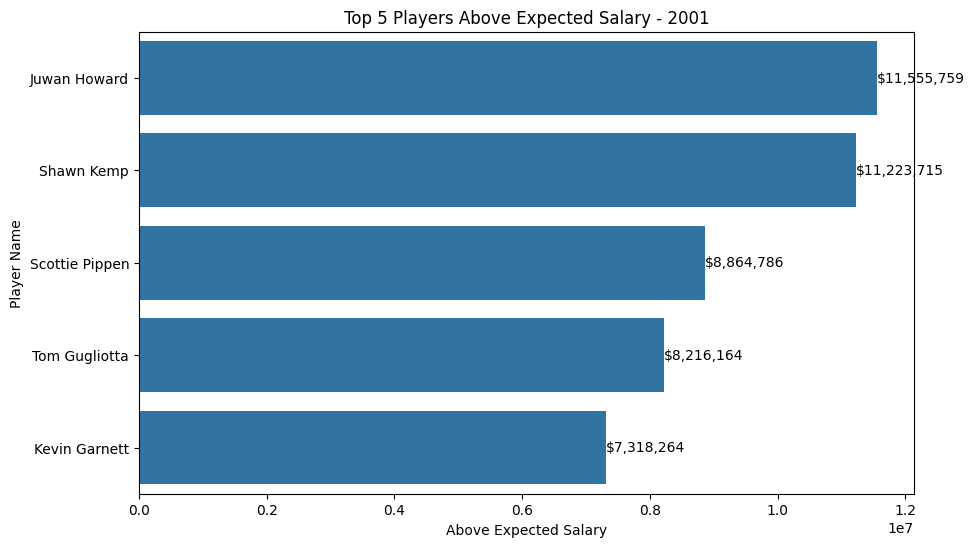

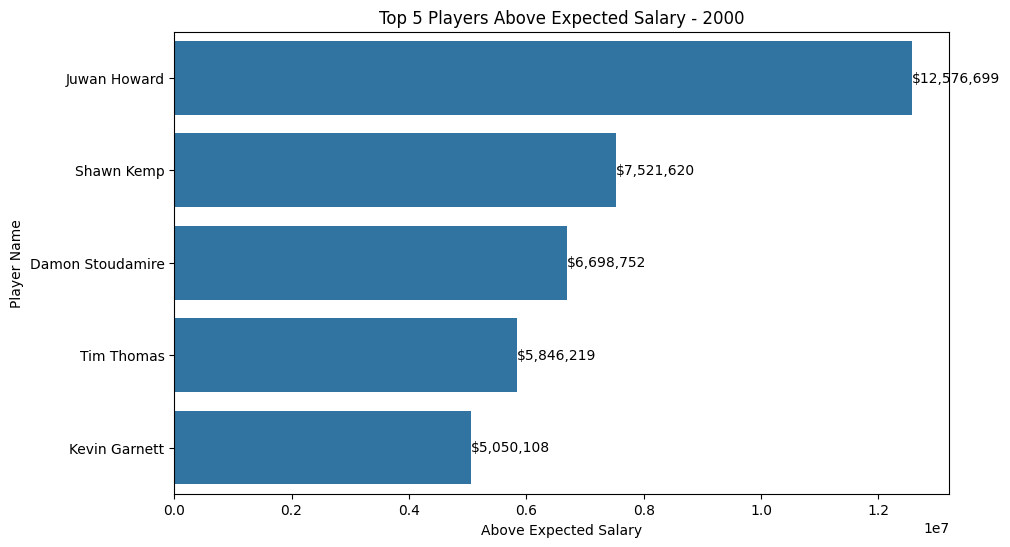

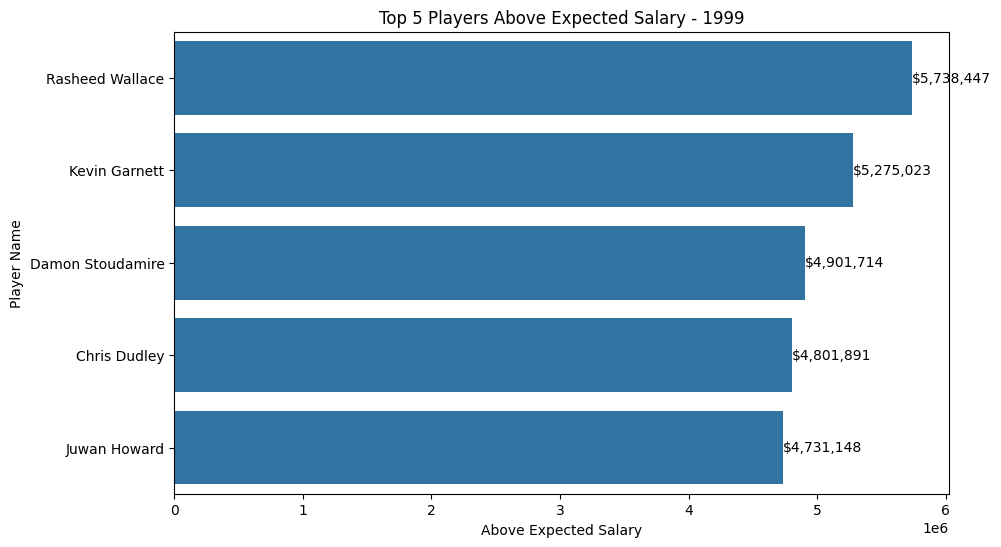

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
years = df["year"].unique()

years = sorted(years, reverse=True)

for year in years:
    df_year = df[df["year"] == year]
    df_year_superfaturados = df_year.sort_values(by="above_expected_salary_clean", ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="above_expected_salary_clean", y="name", data=df_year_superfaturados.head(5))
    plt.title(f"Top 5 Players Above Expected Salary - {year}")
    plt.xlabel("Above Expected Salary")
    plt.ylabel("Player Name")
    for index, value in enumerate(df_year_superfaturados.head(5)["above_expected_salary_clean"]):
        plt.text(value, index, f"${value:,}", va='center')
    plt.show()